In [1]:
!pip install numpy
!pip install pandas

**Importing the Dataset**

In [2]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/NisalAvishka/Heart_Attack_Prediction/main/heart_attack_prediction.csv"
data = pd.read_csv(url, encoding='latin-1')
data.head()

,age,sex,pain,pressure,chol,fbs,restecg,beats,exercise,oldpeak,slope,vessels,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Taking Care of missing values**

In [3]:
data.isnull().sum()

,0
age,0
sex,0
pain,0
pressure,0
chol,0
fbs,0
restecg,0
beats,0
exercise,0
oldpeak,0


In [4]:
data.shape

(303, 14)

**Taking care of duplicate values**

In [5]:
data_dup = data.duplicated().any()
data_dup

True

In [6]:
data = data.drop_duplicates()
data_dup = data.duplicated().any()
data_dup

False

**Data Processing**

In [7]:
cate_val = []
cont_val = []

for column in data.columns:
  if data[column].nunique() <=10:
    cate_val.append(column)
  else:
    cont_val.append(column)

In [8]:
cate_val

['sex',
 'pain',
 'fbs',
 'restecg',
 'exercise',
 'slope',
 'vessels',
 'thall',
 'output']

In [9]:
cont_val

['age', 'pressure', 'chol', 'beats', 'oldpeak']

**Encoding Categorical Data**

In [10]:
cate_val.remove('sex')
cate_val.remove('output')
data = pd.get_dummies(data, columns=cate_val, drop_first=True)
data.head()

,age,sex,pressure,chol,beats,oldpeak,output,pain_1,pain_2,pain_3,...,exercise_1,slope_1,slope_2,vessels_1,vessels_2,vessels_3,vessels_4,thall_1,thall_2,thall_3
0,63,1,145,233,150,2.3,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,37,1,130,250,187,3.5,1,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,41,0,130,204,172,1.4,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,1,120,236,178,0.8,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,0,120,354,163,0.6,1,False,False,False,...,True,False,True,False,False,False,False,False,True,False


**Feature Scaling**

In [11]:
!pip install scikit-learn

In [12]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])
data.head()

,age,sex,pressure,chol,beats,oldpeak,output,pain_1,pain_2,pain_3,...,exercise_1,slope_1,slope_2,vessels_1,vessels_2,vessels_3,vessels_4,thall_1,thall_2,thall_3
0,0.948206,1,0.764066,-0.261285,0.018826,1.084022,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,-1.935339,1,-0.091401,0.067741,1.636979,2.118926,1,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,-1.491717,0,-0.091401,-0.822564,0.980971,0.307844,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,0.171867,1,-0.661712,-0.203222,1.243374,-0.209608,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0.282772,0,-0.661712,2.080602,0.587366,-0.382092,1,False,False,False,...,True,False,True,False,False,False,False,False,True,False


**Splitting the Dataset into the Training set and Testing set**

In [13]:
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split

x = data.drop('output', axis=1)
y = data['output']

# Set seed for reproducibility
seed_value = 42
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed_value)
print(x.shape, x_train.shape, x_test.shape)

(302, 22) (241, 22) (61, 22)


**Logistic Regression**

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [15]:
y_pred_lr = lr.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy : {accuracy_lr:.2f}')

Accuracy : 0.90


**KNeighbors Classifier**

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [17]:
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy_knn:.2f}')

Accuracy: 0.87


**Support Vector Machines**

In [18]:
from sklearn import svm
svm = svm.SVC()
svm.fit(x_train, y_train)

SVC()

In [19]:
y_pred_svm = svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy: {accuracy_svm:.2f}')

Accuracy: 0.87


# Non-Linear ML Algorithms

**Importing the Dataset**

In [20]:
url = "https://raw.githubusercontent.com/NisalAvishka/Heart_Attack_Prediction/main/heart_attack_prediction.csv"
data = pd.read_csv(url, encoding='latin-1')
data.head()

,age,sex,pain,pressure,chol,fbs,restecg,beats,exercise,oldpeak,slope,vessels,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Taking care of duplicate values**

In [21]:
data = data.drop_duplicates()
data.shape

(302, 14)

**Splitting the Dataset into the Training set and Testing set**

In [22]:
x = data.drop('output', axis=1)
y = data['output']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=8)

**Decision Tree Classifier**

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [24]:
y_pred_dt = dt.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy: {accuracy_dt:.2f}')

Accuracy: 0.70


**Random Forest Classifier**

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [26]:
y_pred_rf = rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy_rf:.2f}')

Accuracy: 0.92


**Gradient Boosting Classifier**

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [28]:
y_pred_gbc = gbc.predict(x_test)
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
print(f'Accuracy: {accuracy_gbc:.2f}')

Accuracy: 0.84


**Accuracy Score Compare**

In [29]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RFC','GBC'],
                           'ACC':[accuracy_lr,
                                  accuracy_svm,
                                  accuracy_knn,
                                  accuracy_dt,
                                  accuracy_rf,
                                  accuracy_gbc,
                                  ]})
final_data


,Models,ACC
0,LR,0.901639
1,SVM,0.868852
2,KNN,0.868852
3,DT,0.704918
4,RFC,0.918033
5,GBC,0.836066


<Axes: xlabel='Models', ylabel='ACC'>

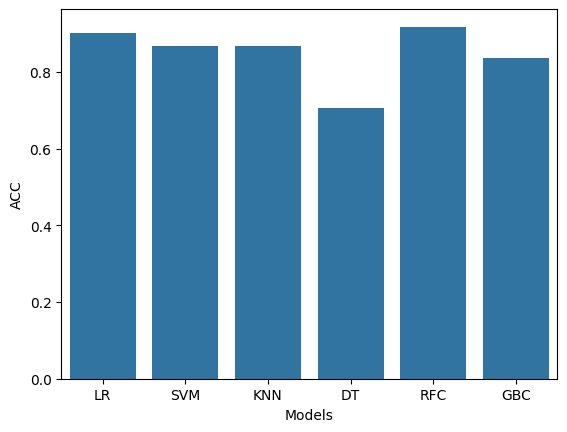

In [30]:
import seaborn as sns
sns.barplot(x=final_data['Models'], y=final_data['ACC'])

**Train Random Forest Classifier using full Dataset**

In [31]:
x = data.drop('output', axis=1)
y = data['output']
x.shape

(302, 13)

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf_new = RandomForestClassifier()
rf_new.fit(x, y)

RandomForestClassifier()

**Prediction Using new data**

In [33]:
new_data = pd.DataFrame({
    'age' : 52,
    'sex' : 1,
    'pain' : 0,
    'pressure' : 130,
    'chol' : 199,
    'fbs' : 0,
    'restecg' : 0,
    'beats' : 171,
    'exercise' : 1,
    'oldpeak' : 1.6,
    'slope' : 0,
    'vessels' : 0,
    'thall' : 1,
}, index=[0])
new_data

,age,sex,pain,pressure,chol,fbs,restecg,beats,exercise,oldpeak,slope,vessels,thall
0,52,1,0,130,199,0,0,171,1,1.6,0,0,1


In [34]:
predict = rf_new.predict(new_data)
if predict[0] == 0:
  print("No Heart Attack")
else:
  print("Heart Attack in future")

No Heart Attack


**Save the model**

In [35]:
import pickle
with open('predictor.pickle', 'wb') as file:
    pickle.dump(rf_new, file)